In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import eigh
from sklearn import datasets
%config InlineBackend.figure_format = 'retina'
np.random.seed(21)
import os
from PIL import Image
from tqdm import tqdm
from sklearn.decomposition import PCA

###  Load the data set

And look at some of the images


In [2]:
data_files = list(os.listdir('KDEF_Straight'))
size_im = np.array(Image.open('KDEF_Straight/' + data_files[0])).shape
im_size = size_im[0]//3, size_im[1]//3
X = np.zeros((len(data_files), im_size[0]*im_size[1]))
for i, file in tqdm(enumerate(data_files)):
    im = Image.open('KDEF_Straight/' + file).convert('L')
    im = im.resize((im_size[1], im_size[0]))
    X[i,:] = (np.array(im)/255).flatten()

0it [00:00, ?it/s]

933it [00:10, 92.00it/s] 


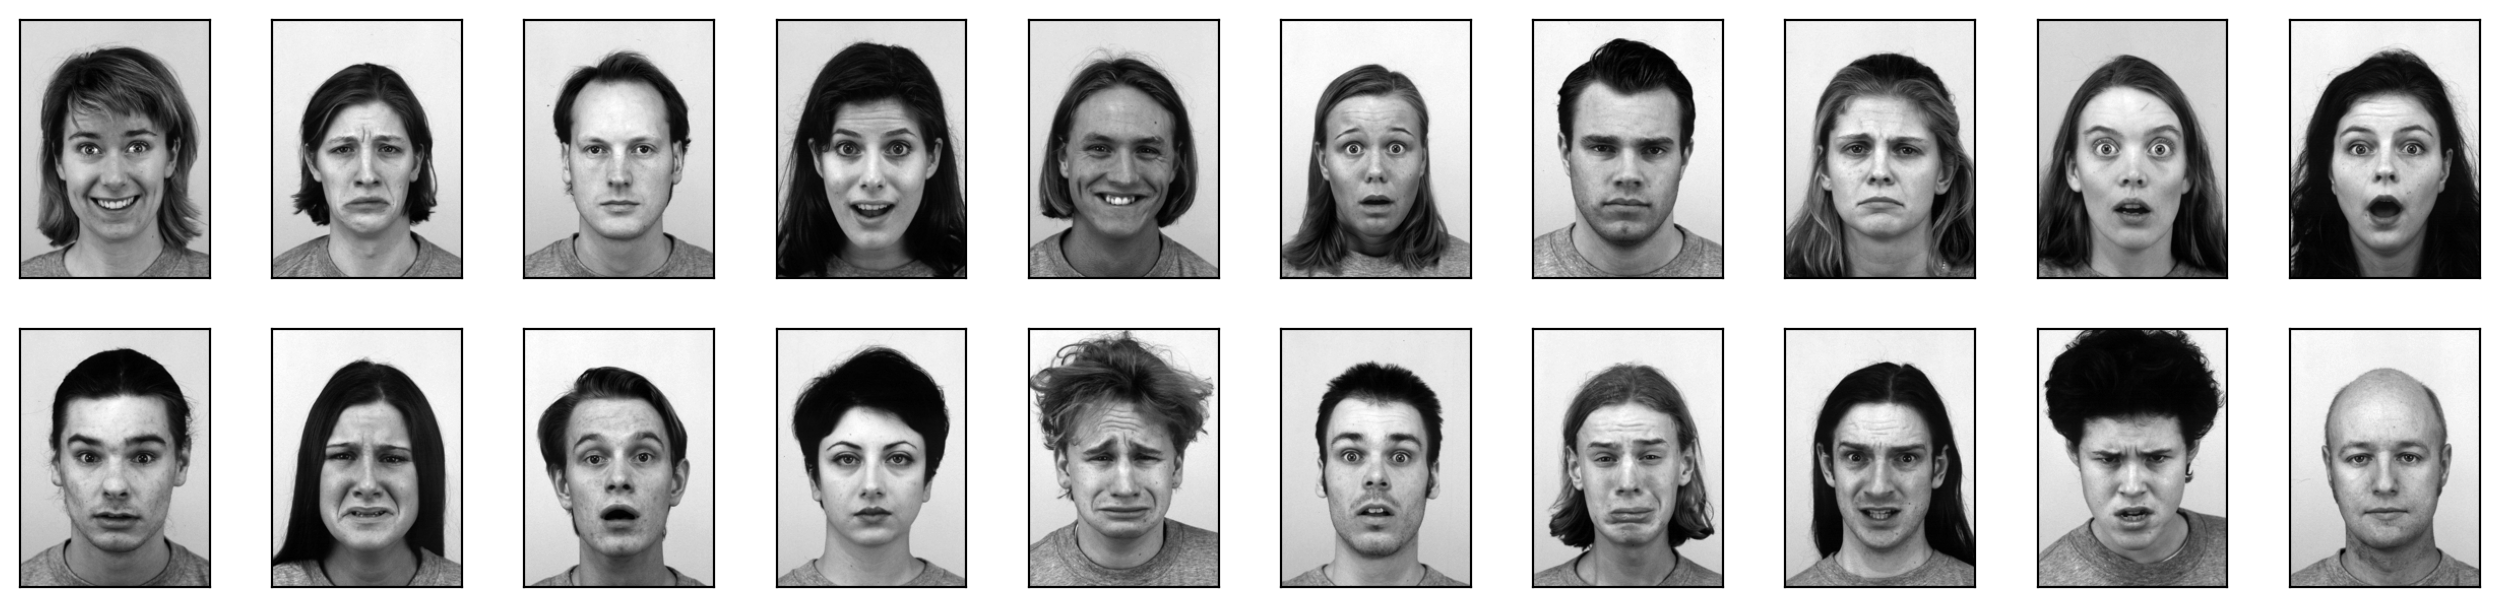

In [3]:
fig = plt.figure(figsize=(16,80))
random_is = np.random.randint(0, X.shape[0], 20)
for j, i in enumerate(random_is):    
    ax = fig.add_subplot(40,10,j+1,xticks = [], yticks = [])
    image_i = X[i,:]
    ax.imshow(image_i.reshape(im_size), cmap=plt.cm.gray)

###  Normalizing the data

Subtract the average image from all the images. Do not standardise (divide by the standard deviation).

Before applying PCA it is custom to normalize the data to avoid that the scales of single features dominate the first principle components.

For face images, normalization is performed by computing the average training image $\widehat{\mathbf{x}}$ and subtracting it from each of the training images, $\mathbf{x}_i - \widehat{\mathbf{x}}$. 


In [4]:
# X_mean = np.mean(X,axis=0)
# X = X - X_mean

# plt.figure(figsize=(20, 6))
# plt.imshow(X_mean.reshape(im_size), cmap = plt.cm.gray)
# plt.title('average image');

###  Principal component analysis and eigenfaces

Run PCA on the images (with the average image subtracted). The scores (i.e., the representation of the images in PCA space) will be the predictors in the linear encoding model.

In [5]:
#define PCA model to use
pca = PCA(copy=True)

#fit PCA model to data
scores = pca.fit_transform(X)

# Save the scores and components
np.save("PCs.npy", scores)
np.save("components.npy", pca.components_)
np.save("mean.npy", pca.mean_)

## 3
Visually present the first few PCA components as images. Visualise a component by reconstructing the images that has the max/min score for that component. Compare these to the mean image. You can also create synthetic image using scores that lie somewhere between the max/min score. In this way you can visualise the effect that one principal component has on the images. **Show figures of your visualisation. What image features do the PCs represent?**

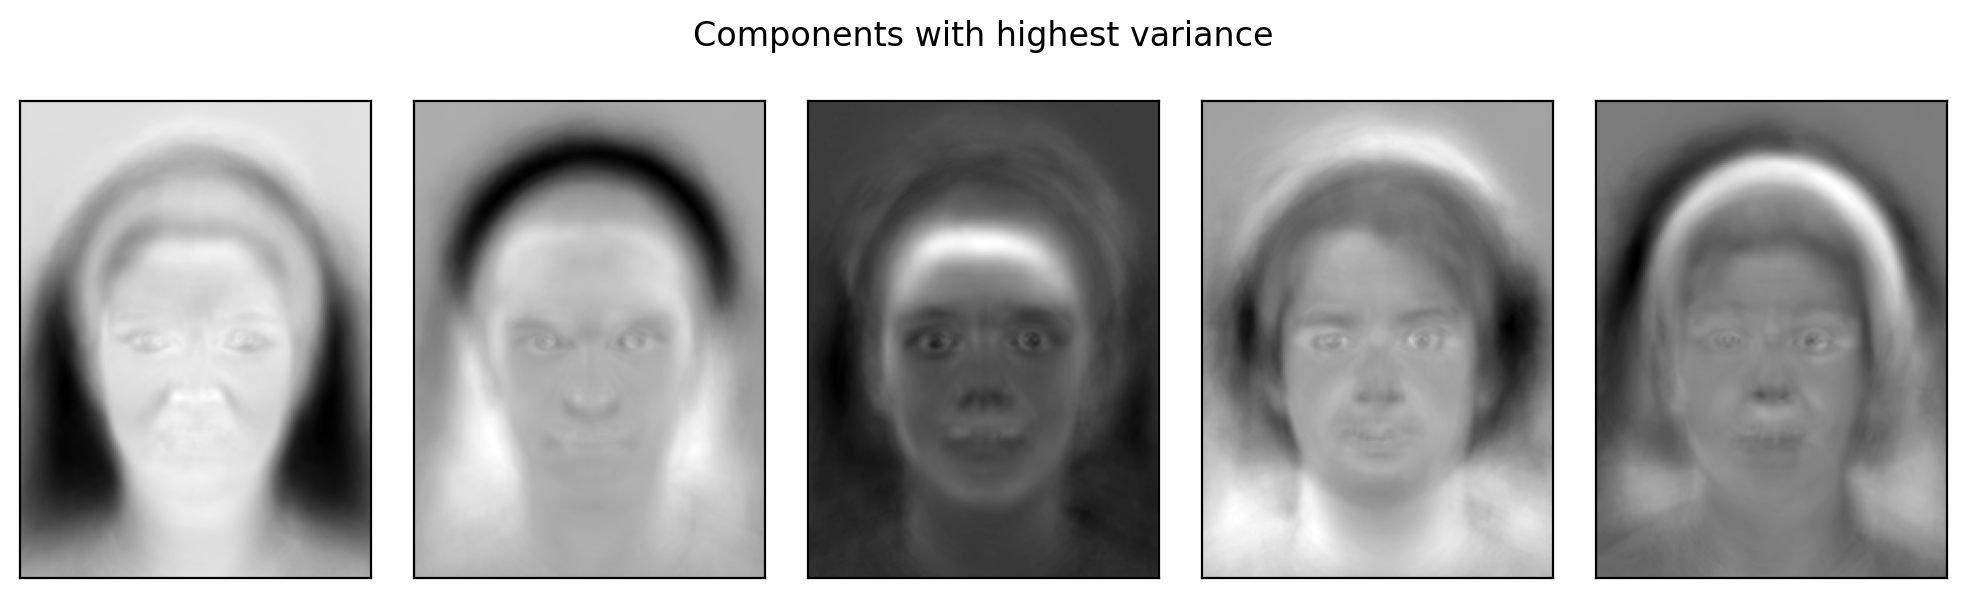

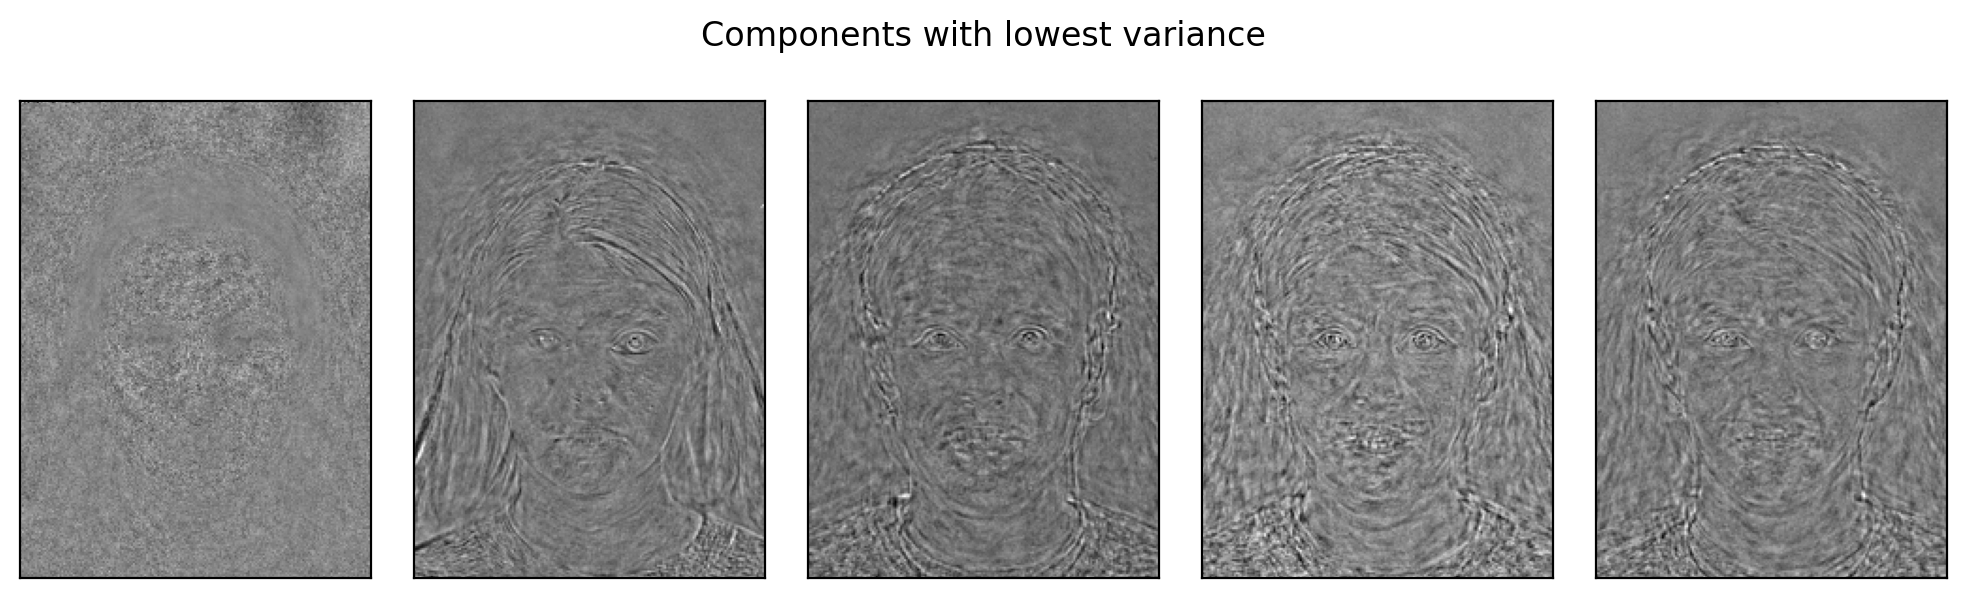

In [6]:
# plot eigenfaces
fig = plt.figure(figsize=(10,3),tight_layout=True)
for i in range(5):
    ax = fig.add_subplot(1, 5,i+1,xticks = [], yticks = [])  
    im = pca.components_[i,:]
    ax.imshow(im.reshape(im_size),cmap = plt.cm.gray)
fig.suptitle('Components with highest variance');
plt.show();

# plot eigenfaces
fig = plt.figure(figsize=(10,3),tight_layout=True)
for i in range(1,6):
    ax = fig.add_subplot(1, 5,i,xticks = [], yticks = [])  
    im = pca.components_[-i,:]
    ax.imshow(im.reshape(im_size),cmap = plt.cm.gray)
plt.grid()
fig.suptitle('Components with lowest variance');
plt.show();

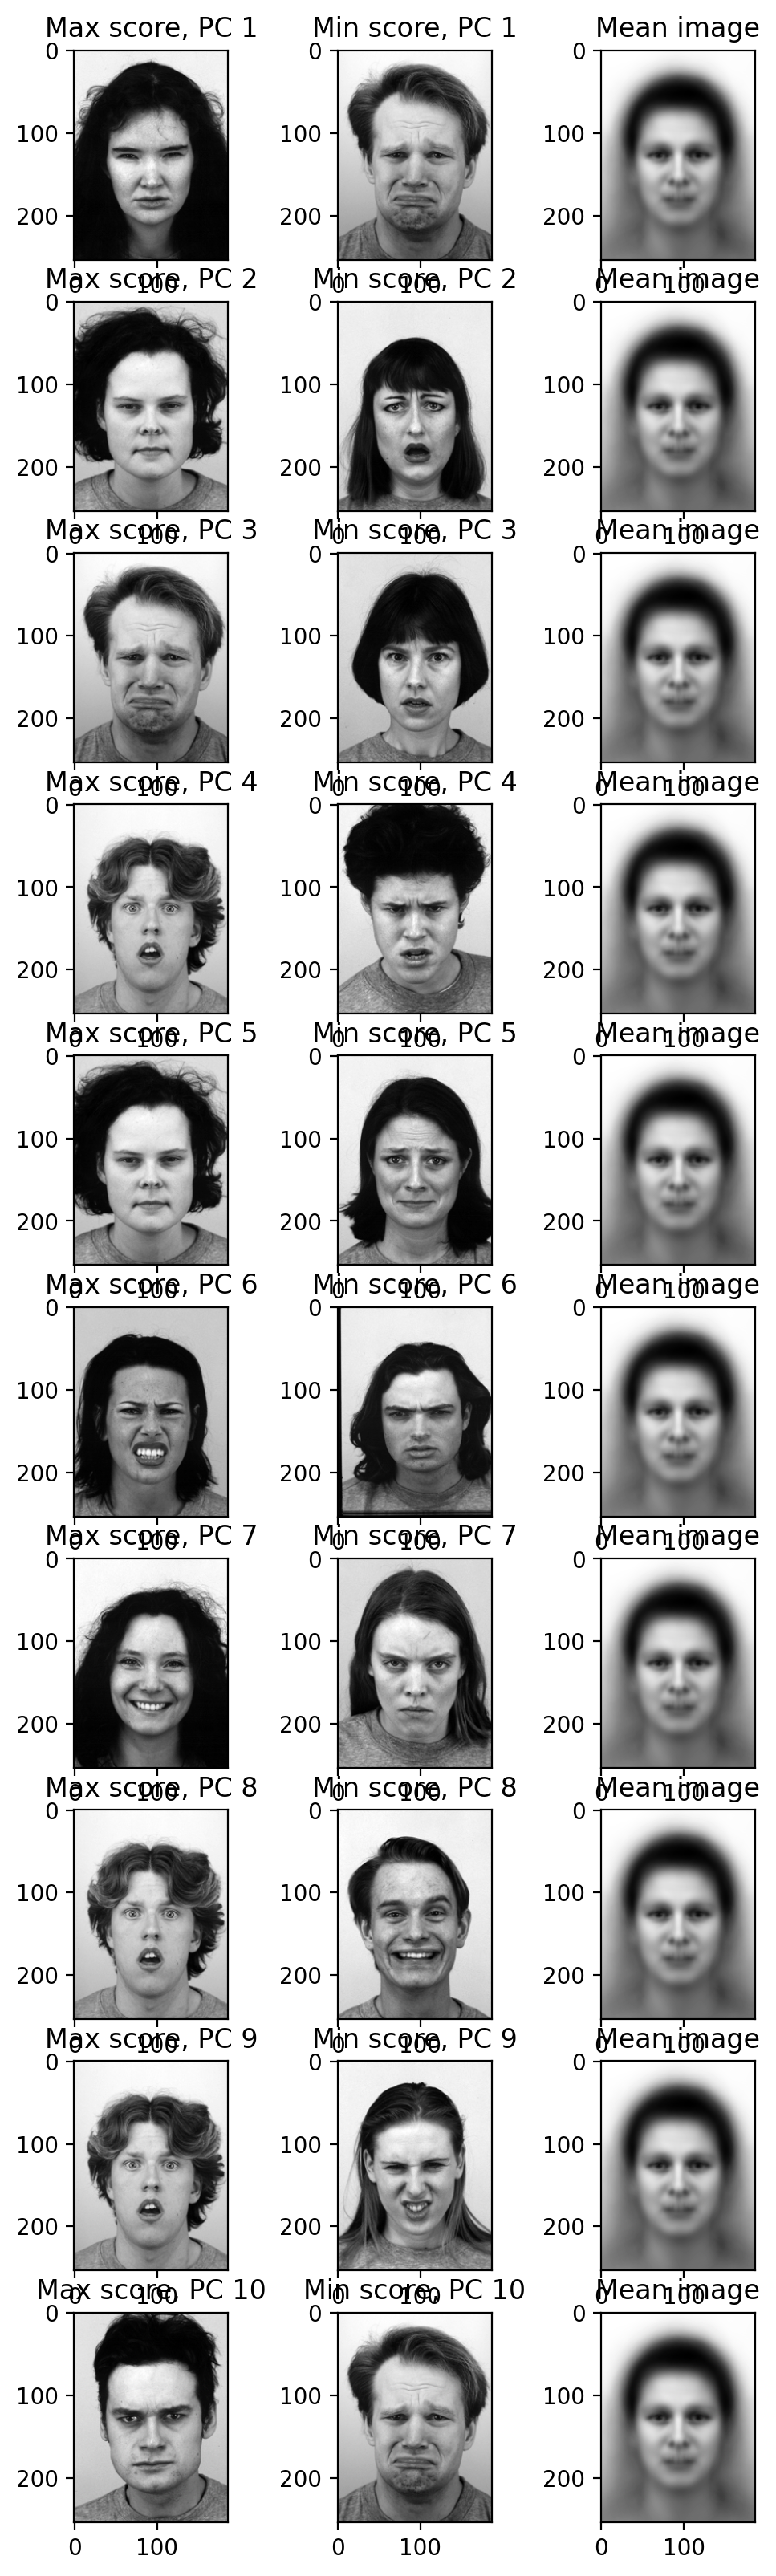

In [7]:
fig, axes = plt.subplots(10, 3, figsize=(6, 20))
for i in range(10):
    # Find index of image that has max score for component i
    max_index = np.argmax(scores[:, i])
    # Find index of image that has min score for component i
    min_index = np.argmin(scores[:, i])
    # Reshape images into 
    max_image = X[max_index].reshape(im_size)
    min_image = X[min_index].reshape(im_size)
    # Plot images using imshow
    axes[i, 0].imshow(max_image, cmap='gray')
    axes[i, 0].set_title(f'Max score, PC {i+1}')
    axes[i, 1].imshow(min_image, cmap='gray')
    axes[i, 1].set_title(f'Min score, PC {i+1}')
    # Plot mean image using imshow
    axes[i, 2].imshow(pca.mean_.reshape(im_size), cmap='gray')
    axes[i, 2].set_title('Mean image')
plt.show()

In [18]:
pca.components_[:2].shape

(2, 47498)

In [21]:
projected  = scores
first_component = pca.components_[0]
# Make sure your first component is a row vector
first_component = first_component.reshape(1,-1) 
first_proj = projected[:,0]
# Make sure your first component is a column vector
first_proj = first_proj.reshape(-1,1)
# do inverse transform (No you have to add the mean as thse algorithm 
# works on zero mean data) 
recon_using_first_comp = np.dot(first_proj, first_component) + pca.mean_

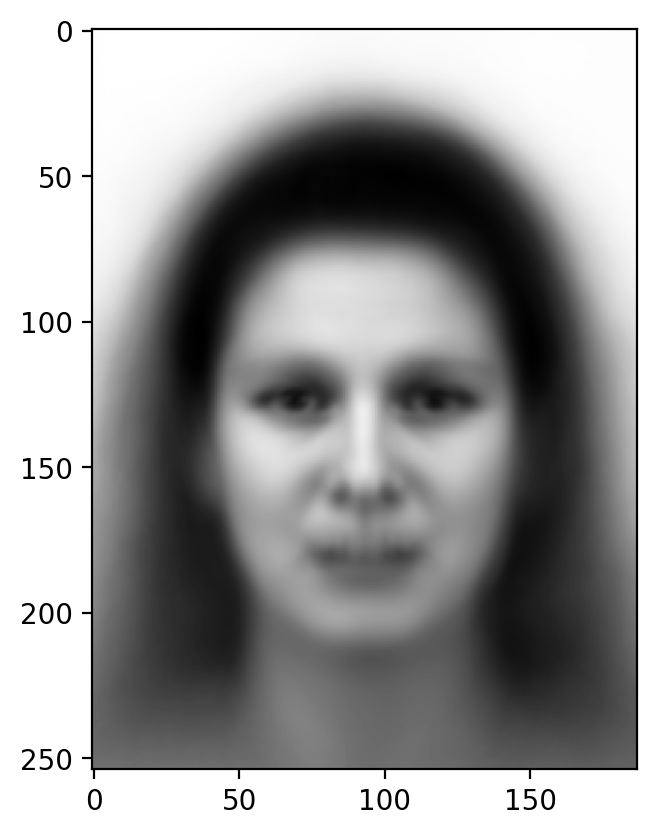

In [22]:
plt.imshow(recon_using_first_comp[0,:].reshape(im_size), cmap = plt.cm.gray)

In [9]:
recon_using_first_comp.shape

(933, 47498)

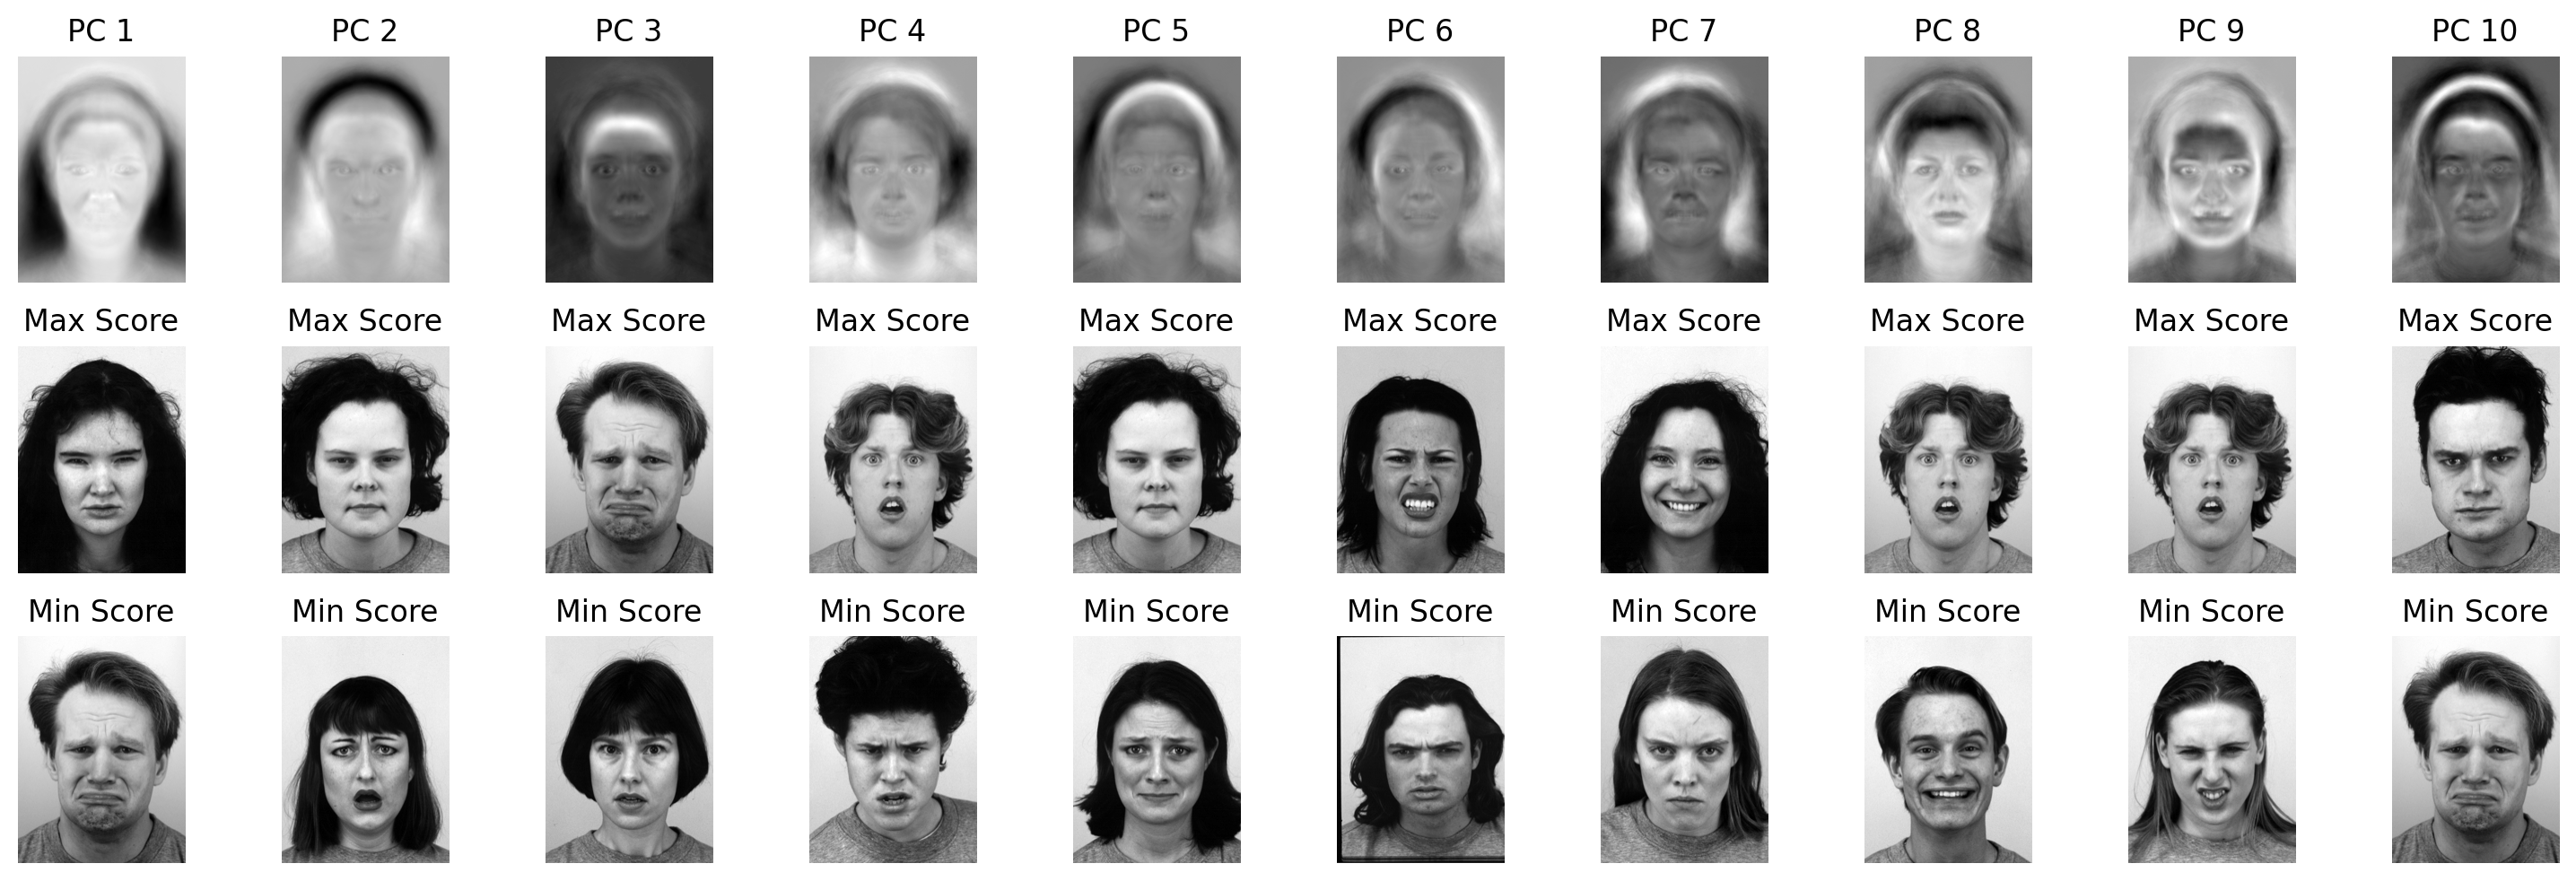

In [24]:
components = pca.components_
mean_image = pca.mean_
n_components = 10
plt.figure(figsize=(15, 5))
for i in range(n_components):
    plt.subplot(3, n_components, i + 1)
    plt.imshow(components[i].reshape(im_size), cmap='gray')
    plt.title(f'PC {i + 1}')
    plt.axis('off')

    # Find the image with max and min score for the current component
    max_idx = np.argmax(X.dot(components[i]))
    min_idx = np.argmin(X.dot(components[i]))

    plt.subplot(3, n_components, i + n_components + 1)
    plt.imshow(X[max_idx].reshape(im_size), cmap='gray')
    plt.title('Max Score')
    plt.axis('off')

    plt.subplot(3, n_components, i + 2 * n_components + 1)
    plt.imshow(X[min_idx].reshape(im_size), cmap='gray')
    plt.title('Min Score')
    plt.axis('off')

plt.tight_layout()
plt.show()


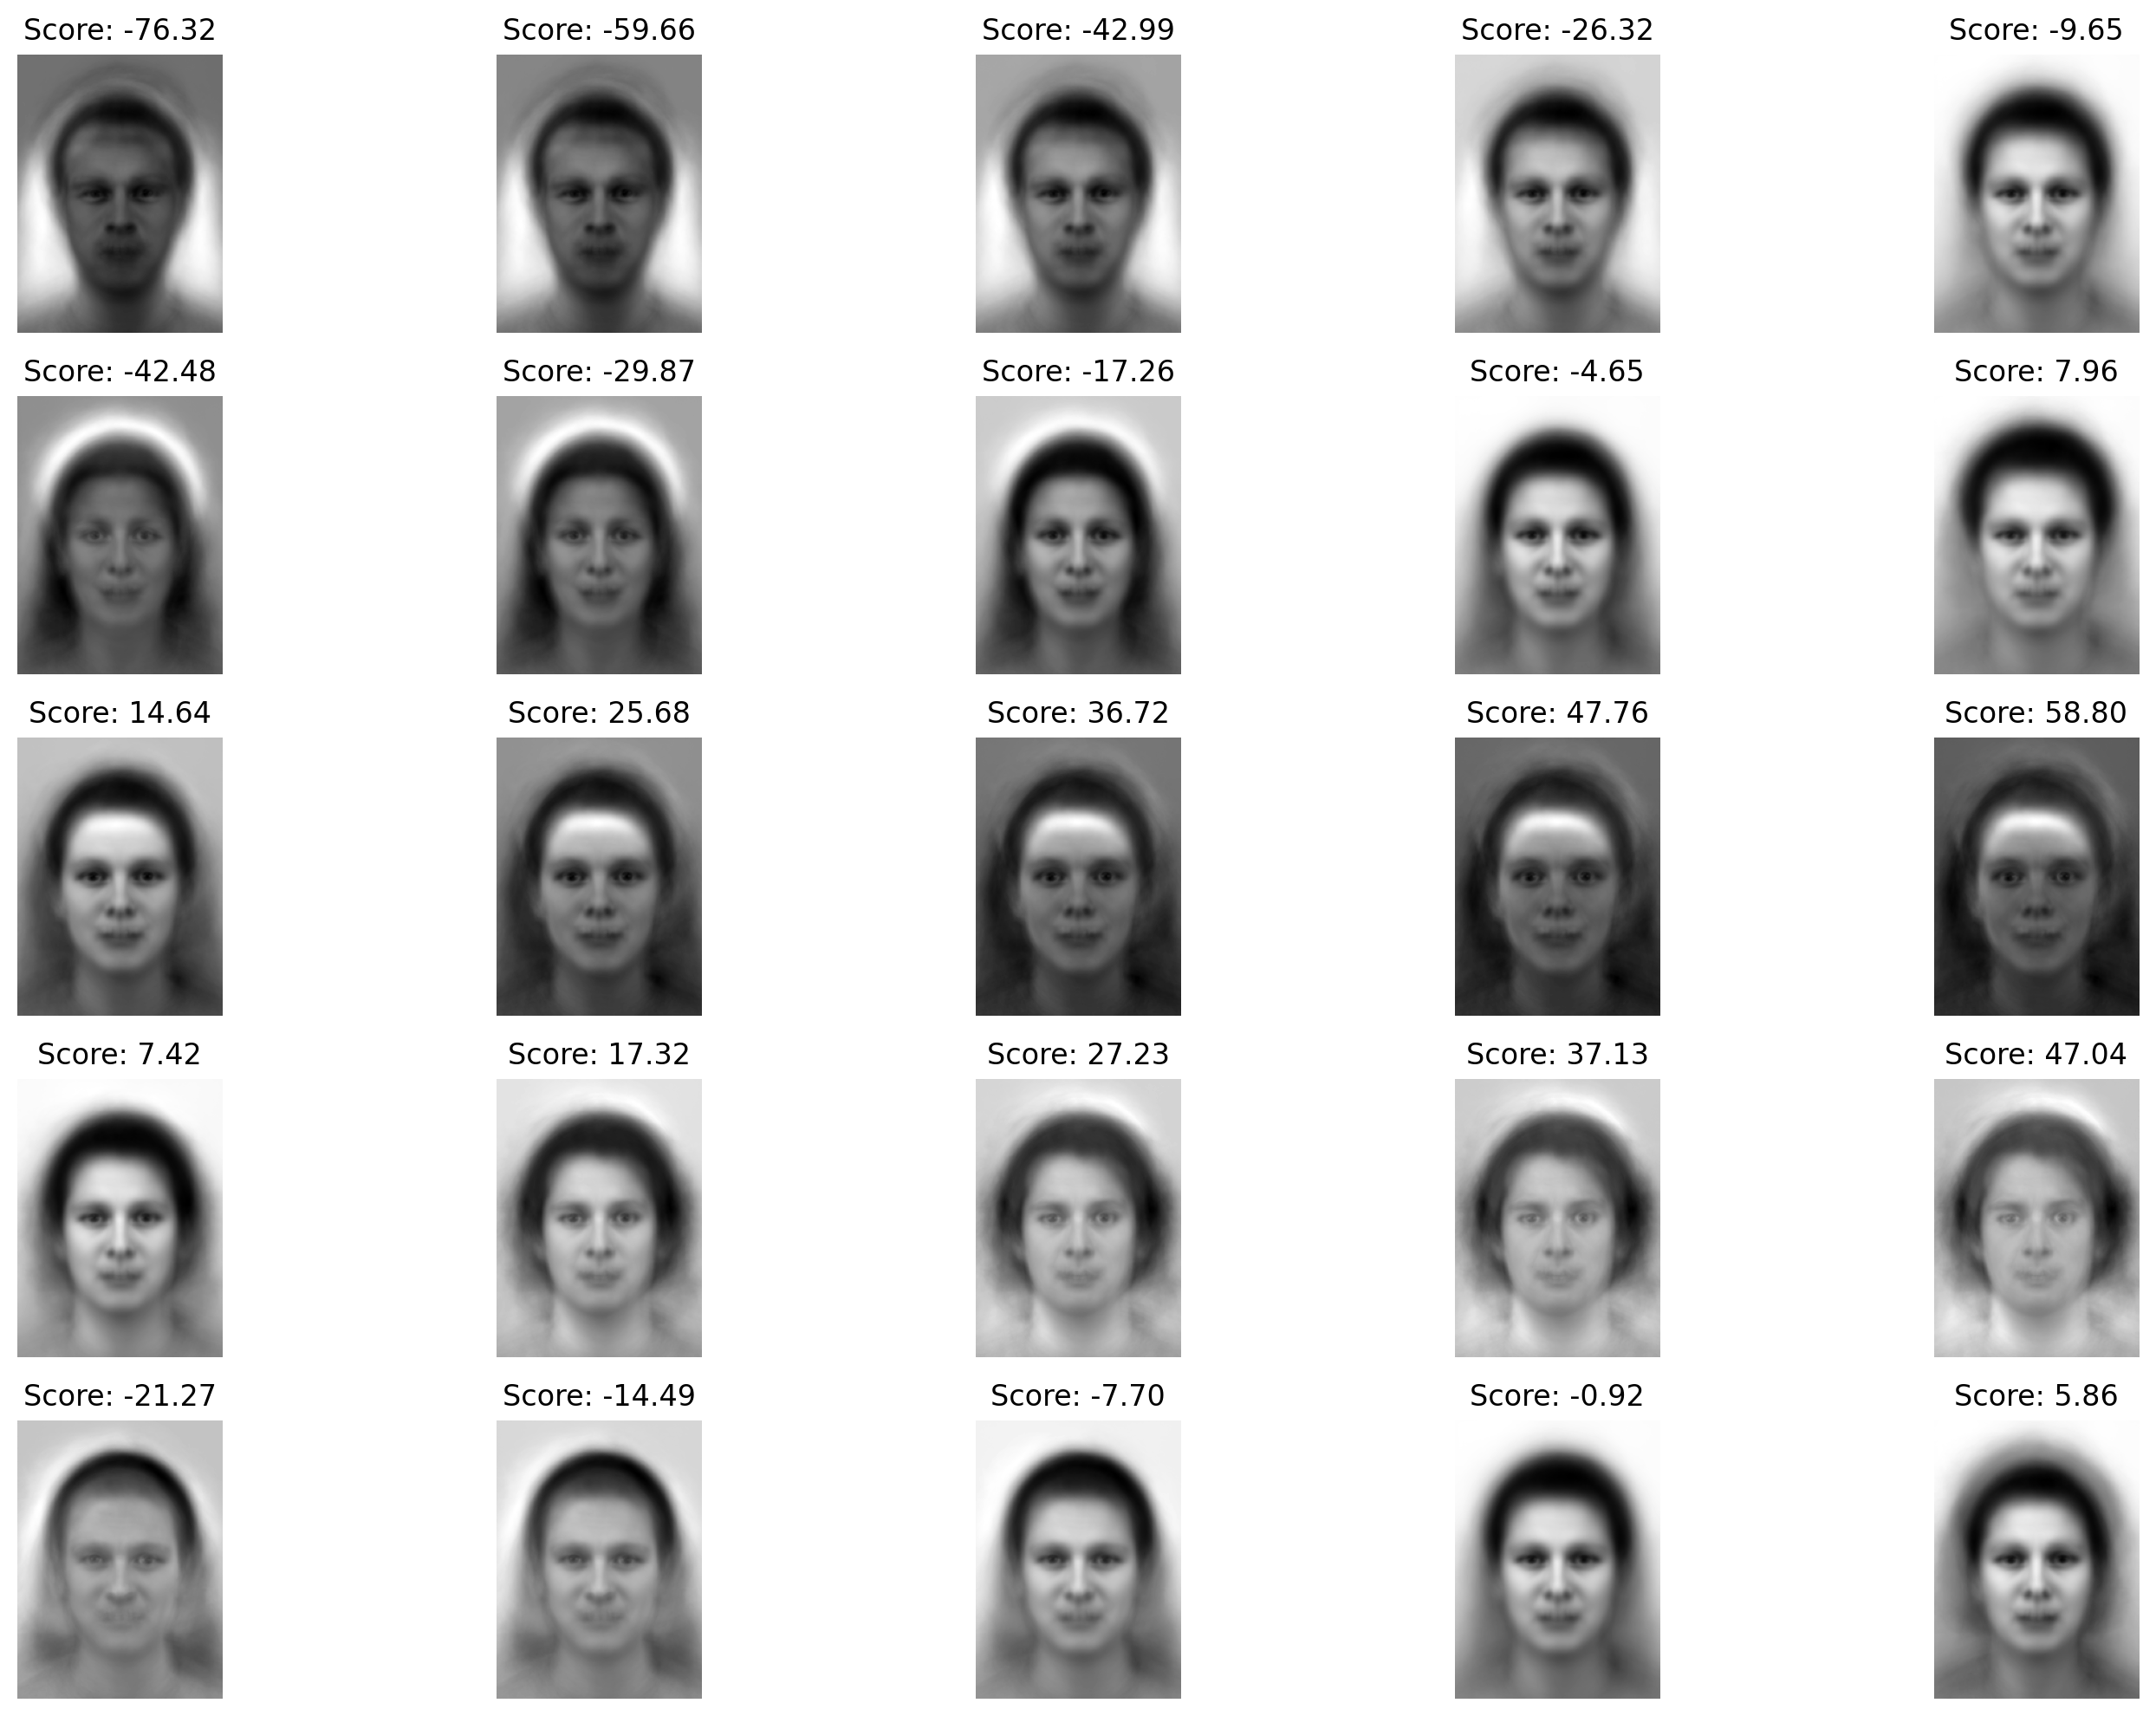

In [78]:
# rows are components, columns are images
n_img = 5
fig, ax = plt.subplots(n_img, 5, figsize=(15, 10), tight_layout=True)
for i in range(n_img):
    max_idx = np.argmax(X.dot(components[i]))
    min_idx = np.argmin(X.dot(components[i]))
    synthetic_scores = np.linspace(X[min_idx].dot(components[i]), X[max_idx].dot(components[i]), num=5)

    for j, score in enumerate(synthetic_scores):
        synthetic_image = mean_image + score * components[i]
        ax[i,j].imshow(synthetic_image.reshape(im_size), cmap='gray')
        ax[i,j].set_title(f'Score: {score:.2f}')
        ax[i,j].axis('off')

plt.show()

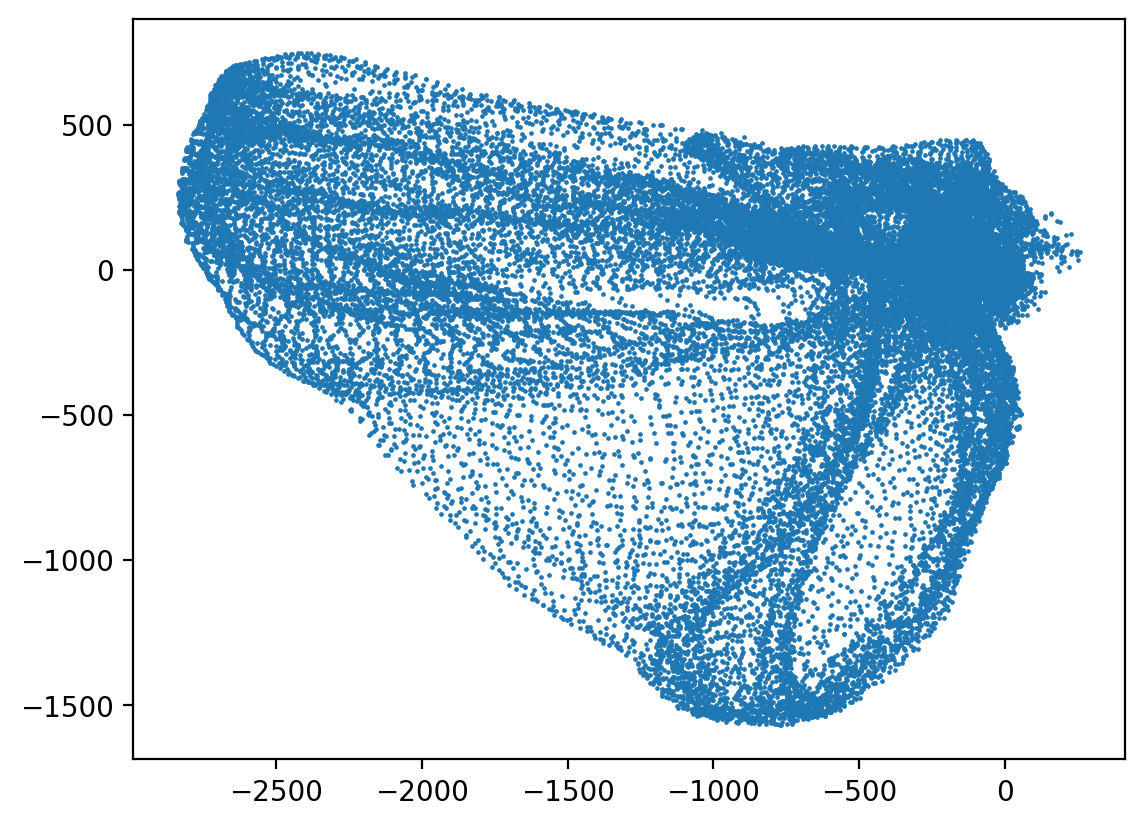

In [41]:
X_proj = scores[:,0:2].T@X
plt.scatter(X_proj[0,:], X_proj[1,:], s=0.5)

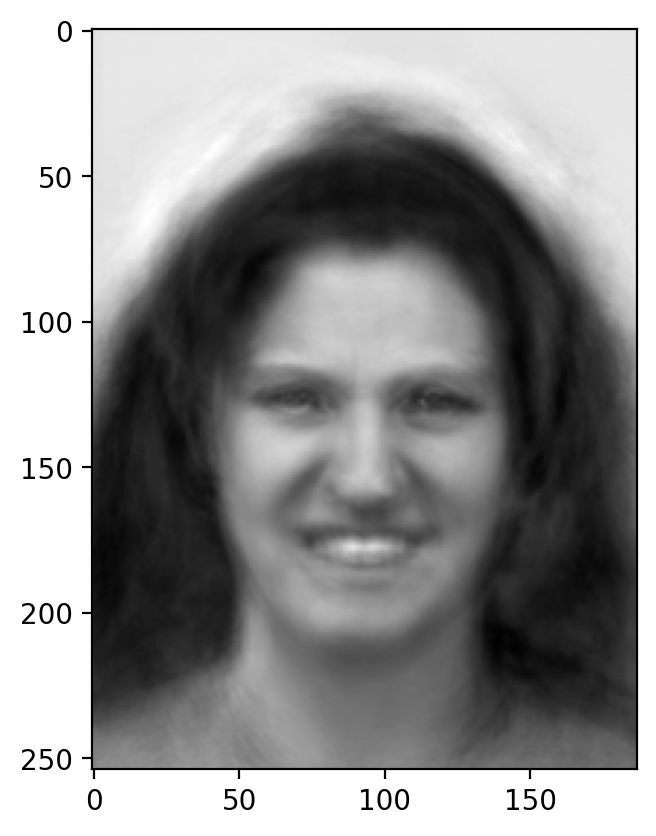

In [79]:
# example of image reconstructed using 60 components
nComp = 60
Xhat = scores[:,:nComp] @ pca.components_[:nComp,:]
Xhat += pca.mean_
plt.imshow(Xhat[9,:].reshape(im_size), cmap = plt.cm.gray)

## 4
Show a bar plot of the variance explained for all the PCs. Use it to select which PCs you want to include in your model. You should reduce the dimensionality significantly. How did you decide?

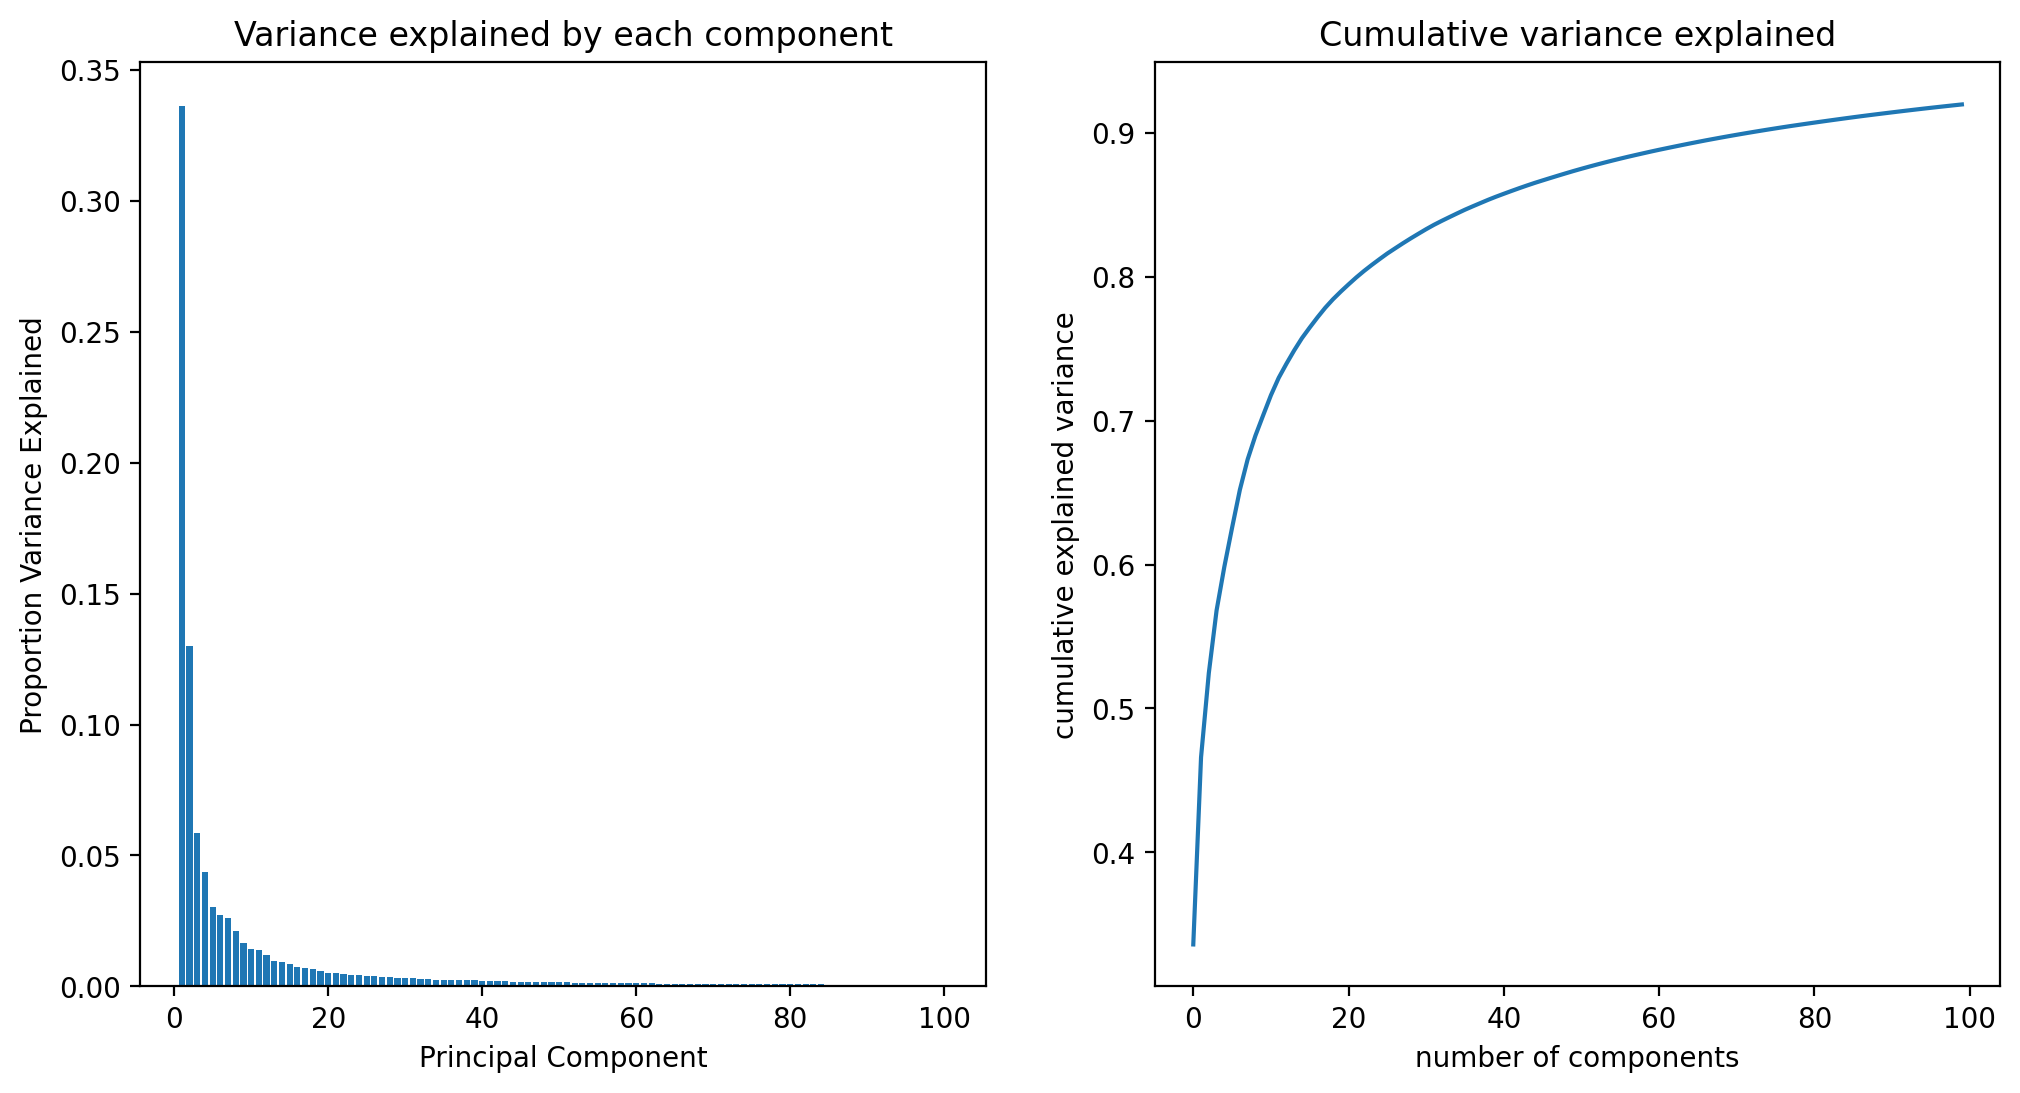

In [54]:
PC_values = np.arange(pca.n_components_) + 1
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].bar(PC_values[:100], pca.explained_variance_ratio_[:100])
ax[0].set_title('Variance explained by each component')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Proportion Variance Explained')

#plot cummulative variance explained    
summ = pca.explained_variance_ratio_.sum()
cumsum = 0
total_var_explained = np.zeros(100)
for i in range(100):    
    cumsum += pca.explained_variance_ratio_[i]
    total_var_explained[i]=(cumsum/summ)
ax[1].plot(total_var_explained)
ax[1].set_xlabel('number of components')
ax[1].set_ylabel('cumulative explained variance');
ax[1].set_title('Cumulative variance explained');

It looks like using 60 Principal components is fitting, as the values are negligible after that and we can achieve 90% variance explained using 60 components